In [1]:
#import pystan
#model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
#model = pystan.StanModel(model_code=model_code)  # this will take a minute
#y = model.sampling(n_jobs=1).extract()['y']
#y.mean()  # should be close to 0

In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import plotly.graph_objs as go
import seaborn as sns
from sklearn import metrics
import pystan

In [2]:
#pip install fbprophet

In [3]:
#prophet
from fbprophet import Prophet

In [4]:
data = pd.read_csv('../data/avocado.csv')
data.head()

,Column1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,51,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,51,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,51,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


# Data Cleaning

In [5]:
features = data.columns
features

Index(['Column1', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
data.isnull().sum()

Column1         0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
data.dtypes

Column1           int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
data = data.rename(columns={"4046":"Small Avocados","4225":"Medium Avocados","4770":"Large Avocados"})
data.head()

,Column1,Date,AveragePrice,Total Volume,Small Avocados,Medium Avocados,Large Avocados,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,51,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,51,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,51,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


In [30]:
# Datetime Code for Time Separation, duplicate df

data_sep = data.copy()
data_sep['year'] = pd.DatetimeIndex(data_sep['Date']).year
data_sep['month'] = pd.DatetimeIndex(data_sep['Date']).month
data_sep['day'] = pd.DatetimeIndex(data_sep['Date']).day
data_sep.head()

,Column1,Date,AveragePrice,Total Volume,Small Avocados,Medium Avocados,Large Avocados,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,4
1,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,1,4
2,51,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington,1,4
3,51,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise,1,4
4,51,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston,1,4


In [31]:
data.head()

,Column1,Date,AveragePrice,Total Volume,Small Avocados,Medium Avocados,Large Avocados,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,51,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,51,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,51,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


# Visualizations

In [32]:
# Visualizations

## Mean Avocado Volume Over Time

In [33]:
# Avocado Volume, Total and By Size


all_volumes = ['Total Volume', 'Small Avocados', 'Medium Avocados', 'Large Avocados']
vol_per_week = data.groupby(['Date']).sum().loc[:, all_volumes].reset_index()

In [34]:
pip install -U kaleido

Requirement already up-to-date: kaleido in c:\users\alexe\anaconda3\lib\site-packages (0.2.1)
Note: you may need to restart the kernel to use updated packages.


In [35]:
line_plot = [{'x': vol_per_week['Date'],'y': vol_per_week[c],'name': c

             } 
             for c in all_volumes]

layout = {
  'xaxis': {'title': 'Date'},
  'yaxis': {'title': 'Avocado Volume'}
}
#go.Figure
trend_link2 = go.Figure(data=line_plot, layout=layout)
trend_link2.write_image("../img/trend_link2.png")
trend_link2

## Mean Avocado Price Over Time

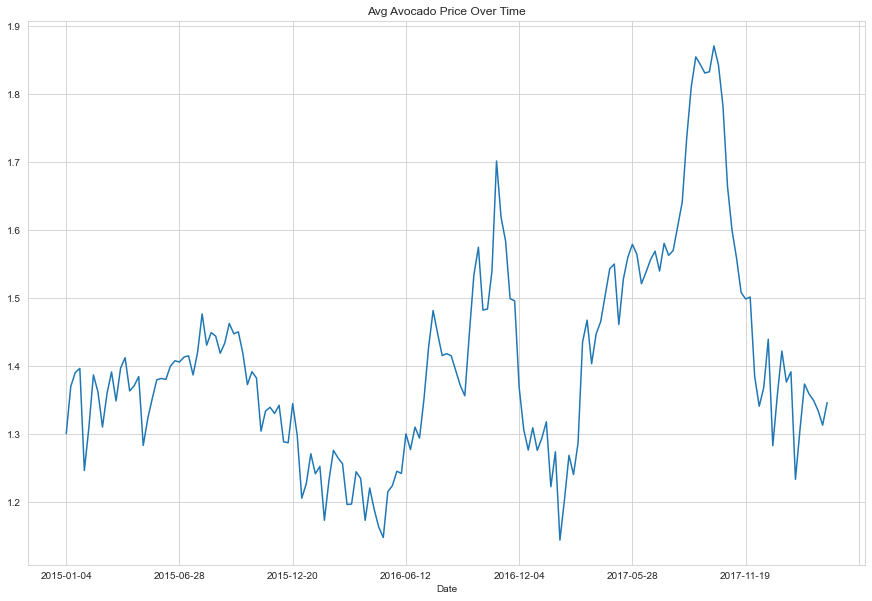

In [36]:
# Price Distribution by Date
date = data_sep.groupby('Date').mean()
trend_link1a = plt.figure(figsize=(15,10))
date['AveragePrice'].plot()
plt.title('Avg Avocado Price Over Time')
trend_link1a.savefig('../img/trend_link1a.jpg', bbox_inches='tight')

## Mean Avocado Prices Per Month

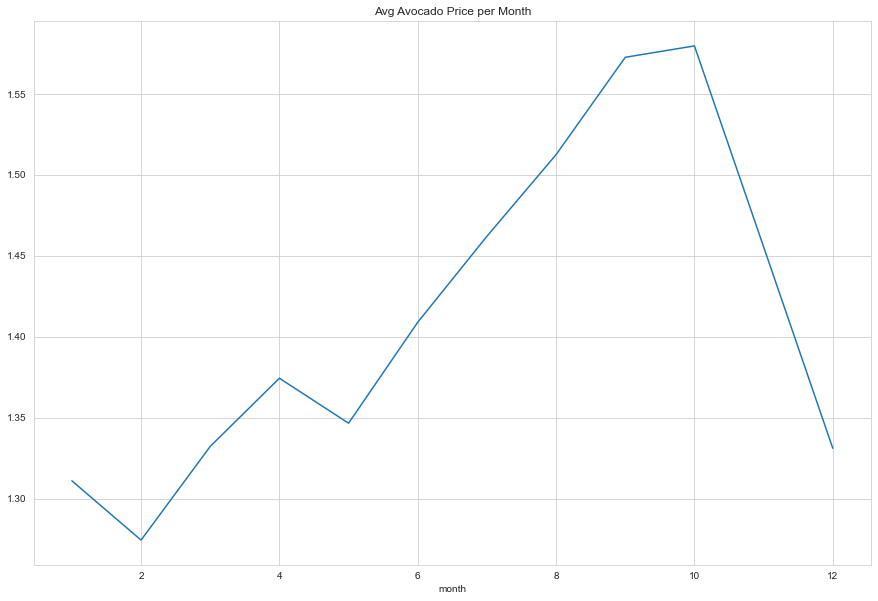

In [37]:
# Price Distribution by Date
date = data_sep.groupby('month').mean()
trend_link1b=plt.figure(figsize=(15,10))
date['AveragePrice'].plot()
plt.title('Avg Avocado Price per Month')
trend_link1b.savefig('../img/trend_link1b.jpg', bbox_inches='tight')

# Seaborn Graphing

## Avocado Price Distribution

Text(0.5, 1.0, 'Avocado Price Distribution')

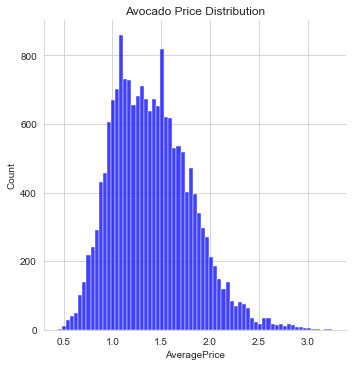

In [38]:
ax = sns.displot(data["AveragePrice"], color = 'blue')
plt.title("Avocado Price Distribution")

## Average Price in Each Region by Type

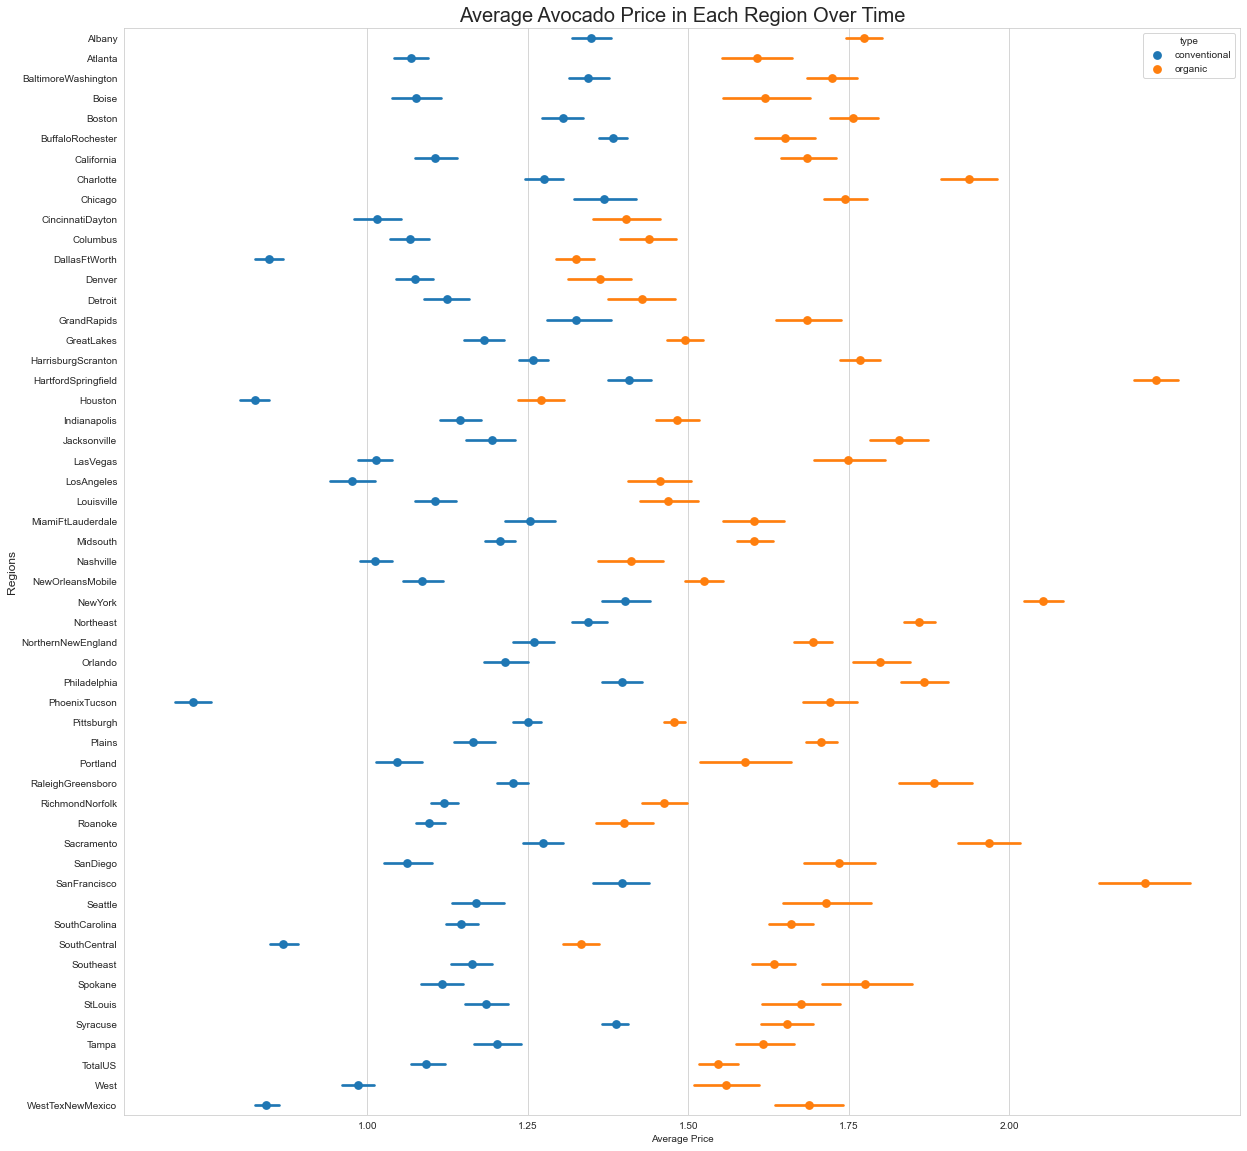

In [39]:
sbn_link1 = plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=data, hue='type',join=False)


plt.xticks(np.linspace(1,2,5))


plt.ylabel('Regions',{'fontsize' : 'large'})
plt.xlabel('Average Price',{'fontsize':'medium'})
plt.title("Average Avocado Price in Each Region Over Time",{'fontsize':20})
sbn_link1.savefig('../img/sbn_link1.jpg', bbox_inches='tight')

## Average Price in Each Region by Year

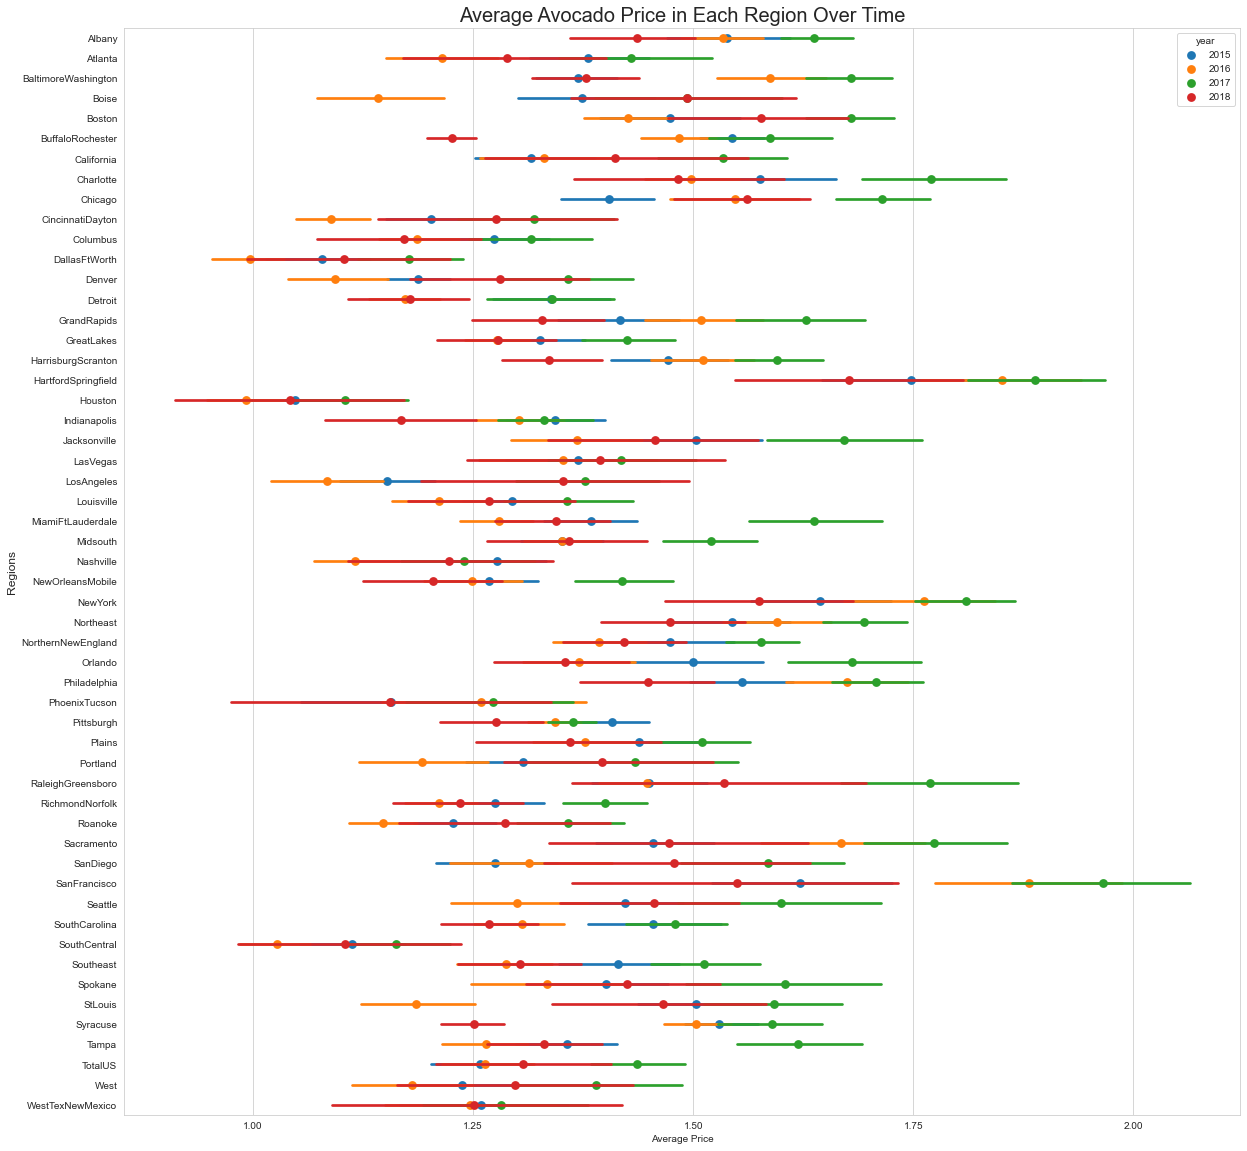

In [40]:
sbn_link2 = plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=data, hue='year',join=False)


plt.xticks(np.linspace(1,2,5))


plt.ylabel('Regions',{'fontsize' : 'large'})
plt.xlabel('Average Price',{'fontsize':'medium'})
plt.title("Average Avocado Price in Each Region Over Time",{'fontsize':20})
sbn_link2.savefig('../img/sbn_link2.jpg', bbox_inches='tight')

In [65]:
data.describe

<bound method NDFrame.describe of        Column1  Date  AveragePrice  Total Volume  Small Avocados  \
0           51     1          1.22      40873.28         2819.50   
1           51     1          1.00     435021.49       364302.39   
2           51     1          1.08     788025.06        53987.31   
3           51     1          1.01      80034.32        44562.12   
4           51     1          1.02     491738.00         7193.87   
...        ...   ...           ...           ...             ...   
18244        0   169          1.04      14503.47           78.95   
18245        0   169          1.41      10028.49          138.15   
18246        0   169          1.55    1559967.20       121007.94   
18247        0   169          1.60     271723.08        26996.28   
18248        0   169          1.62      15303.40         2325.30   

       Medium Avocados  Large Avocados  Total Bags  Small Bags  Large Bags  \
0             28287.42           49.90     9716.46     9186.93      529

## Conventional vs Organic Pricing Over Time

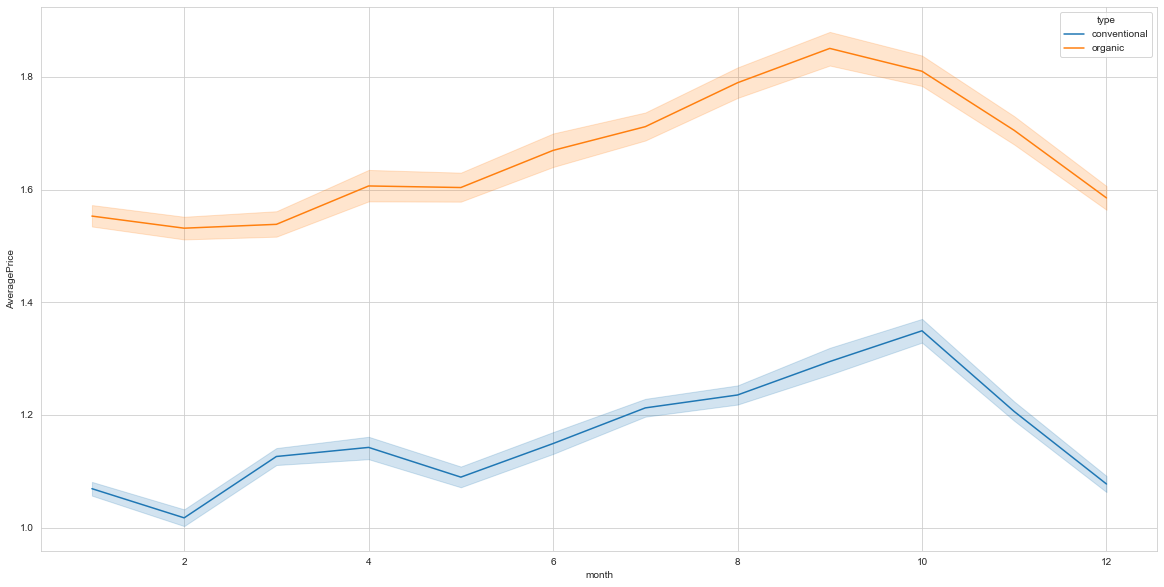

In [42]:
sbn_link2a = plt.figure(figsize=(20,10))
sns.lineplot(x="month", y="AveragePrice", hue='type', data=data_sep)
plt.show()
sbn_link2a.savefig('../img/sbn_link2a.jpg', bbox_inches='tight')

In [48]:
# Objects to Integers
for label, content in data_sep.items():
    if pd.api.types.is_string_dtype(content):
        data[label]  = pd.Categorical(content).codes+1

# Linear Regression ##

In [49]:

# Assign X (data) and y (target)
X = data.drop("AveragePrice", axis=1)
y = data["AveragePrice"]
print(X.shape, y.shape)

(18249, 13) (18249,)


In [50]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [51]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(xtrain,ytrain)
lr_pred=linear.predict(xtest)
linear.score(xtrain, ytrain)

0.44128461352997705

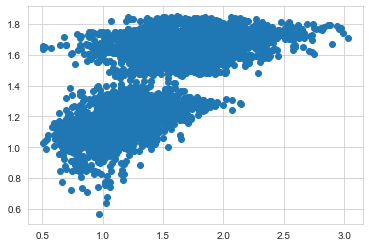

In [53]:
plt.scatter(x=ytest,y=lr_pred)

In [ ]:
# Check Distribution
sns.displot((ytest-lr_pred),bins=100)

# Decision Tree ##

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(xtrain,ytrain)
dt_pred=tree.predict(xtest)

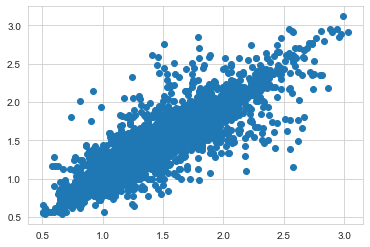

In [34]:
plt.scatter(x=ytest,y=dt_pred)

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
forest = RandomForestRegressor(n_estimators=100)
forest.fit(xtrain, ytrain)
rf_pred = forest.predict(xtest)

forest.score(xtest, ytest)

0.9058891633455008

In [37]:
print('MAE:', metrics.mean_absolute_error(ytest, rf_pred))
print('MSE:', metrics.mean_squared_error(ytest, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, rf_pred)))

MAE: 0.0876063554678939
MSE: 0.0155852750997151
RMSE: 0.12484099927393684


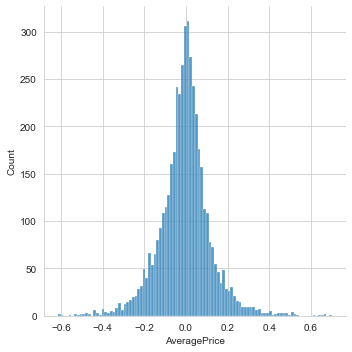

In [38]:
# Check distribution
sns.displot((ytest-rf_pred),bins=100)

In [39]:
data

,Column1,Date,AveragePrice,Total Volume,Small Avocados,Medium Avocados,Large Avocados,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,1,2015,1
1,51,1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,1,2015,2
2,51,1,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,1,2015,3
3,51,1,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,1,2015,4
4,51,1,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,1,2015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,169,1.04,14503.47,78.95,148.37,0.00,14276.15,9992.31,4283.84,0.00,2,2018,50
18245,0,169,1.41,10028.49,138.15,773.22,0.00,9117.12,8208.82,908.30,0.00,2,2018,51
18246,0,169,1.55,1559967.20,121007.94,342853.10,1070.24,1093861.09,902774.79,190941.84,144.46,2,2018,52
18247,0,169,1.60,271723.08,26996.28,77861.39,117.56,166747.85,87108.00,79495.39,144.46,2,2018,53


# Facebook Prophet TimeSeries

In [40]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [41]:
from sklearn.metrics import r2_score

## Volume Predictions

In [45]:
volume_data = data_sep.groupby(['Date']).sum().reset_index()

In [46]:
volume_df = volume_data[['Date','Total Volume']]
volume_df = volume_df.rename(columns={'Date':'ds','Total Volume':'y'})
volume_df

,ds,y
0,2015-01-04,8.467434e+07
1,2015-01-11,7.855581e+07
2,2015-01-18,7.838878e+07
3,2015-01-25,7.646628e+07
4,2015-02-01,1.194532e+08
...,...,...
164,2018-02-25,1.092314e+08
165,2018-03-04,1.118449e+08
166,2018-03-11,1.114652e+08
167,2018-03-18,1.136740e+08


In [47]:
superbowl_cinco = pd.DataFrame({
  'holiday': 'superbowl_cinco',
  'ds': pd.to_datetime(
    ['2015-05-05', '2016-05-05', '2017-05-05', '2018-05-05', '2019-05-05','2020-05-05', '2015-02-01', '2016-02-07', '2017-02-05', '2018-02-04', '2019-02-03', '2020-02-02']
  ),
  'lower_window': 0,
  'upper_window': 0,
})

In [48]:
model1 = Prophet(holidays=superbowl_cinco)

In [49]:
model1.fit(volume_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
future = model1.make_future_dataframe(periods=730)
forecast_1 = model1.predict(future)

In [51]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,superbowl_cinco,superbowl_cinco_lower,superbowl_cinco_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,7.482924e+07,6.882218e+07,8.767824e+07,7.482924e+07,7.482924e+07,3.299963e+06,3.299963e+06,3.299963e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,3.299963e+06,3.299963e+06,3.299963e+06,0.0,0.0,0.0,7.812921e+07
1,2015-01-11,7.516983e+07,7.470176e+07,9.296077e+07,7.516983e+07,7.516983e+07,8.299851e+06,8.299851e+06,8.299851e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,8.299851e+06,8.299851e+06,8.299851e+06,0.0,0.0,0.0,8.346968e+07
2,2015-01-18,7.551041e+07,7.606032e+07,9.399879e+07,7.551041e+07,7.551041e+07,9.511500e+06,9.511500e+06,9.511500e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,9.511500e+06,9.511500e+06,9.511500e+06,0.0,0.0,0.0,8.502191e+07
3,2015-01-25,7.585099e+07,7.477957e+07,9.435785e+07,7.585099e+07,7.585099e+07,8.572394e+06,8.572394e+06,8.572394e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,8.572394e+06,8.572394e+06,8.572394e+06,0.0,0.0,0.0,8.442339e+07
4,2015-02-01,7.619157e+07,1.259922e+08,1.443151e+08,7.619157e+07,7.619157e+07,5.839390e+07,5.839390e+07,5.839390e+07,5.018483e+07,...,5.018483e+07,5.018483e+07,5.018483e+07,8.209077e+06,8.209077e+06,8.209077e+06,0.0,0.0,0.0,1.345855e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2020-03-20,1.284411e+08,1.220243e+08,1.476640e+08,1.190434e+08,1.377242e+08,6.852342e+06,6.852342e+06,6.852342e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,6.852342e+06,6.852342e+06,6.852342e+06,0.0,0.0,0.0,1.352935e+08
895,2020-03-21,1.284784e+08,1.213019e+08,1.489008e+08,1.190683e+08,1.377842e+08,6.864414e+06,6.864414e+06,6.864414e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,6.864414e+06,6.864414e+06,6.864414e+06,0.0,0.0,0.0,1.353428e+08
896,2020-03-22,1.285156e+08,1.220162e+08,1.497662e+08,1.190932e+08,1.378424e+08,6.816915e+06,6.816915e+06,6.816915e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,6.816915e+06,6.816915e+06,6.816915e+06,0.0,0.0,0.0,1.353325e+08
897,2020-03-23,1.285529e+08,1.220415e+08,1.499603e+08,1.190974e+08,1.379010e+08,6.708539e+06,6.708539e+06,6.708539e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,6.708539e+06,6.708539e+06,6.708539e+06,0.0,0.0,0.0,1.352614e+08


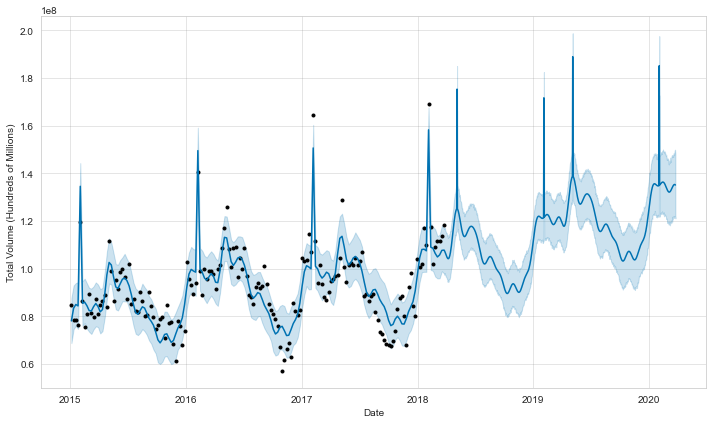

In [56]:
volume_df = model1.plot(forecast_1, xlabel='Date', ylabel='Total Volume (Hundreds of Millions)')
volume_df.savefig('../img/prophet_volume.jpg', bbox_inches='tight')

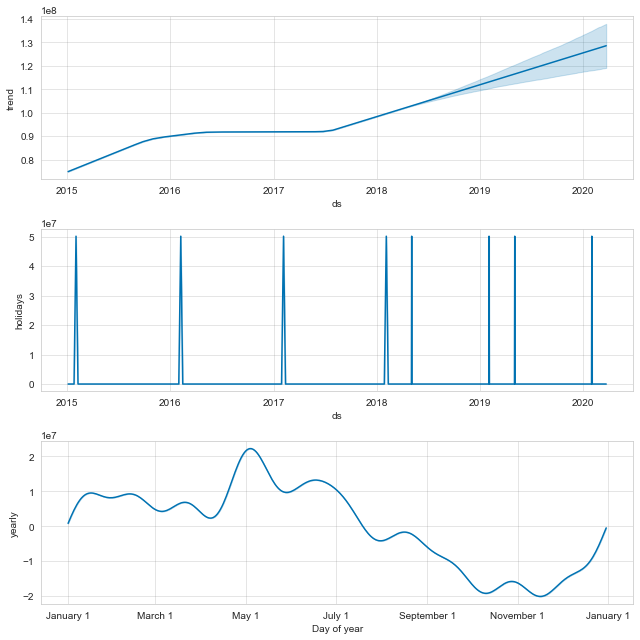

In [57]:
prophet_volume2 = model1.plot_components(forecast_1)
prophet_volume2.savefig('../img/prophet_volume2.jpg', bbox_inches='tight')